In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Loading CSV files

In [4]:
features_dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DM_challenge/datasets/water_table/training_set_values.csv', index_col="id")
test_dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DM_challenge/datasets/water_table/test_set_values.csv', index_col="id")
labels_dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DM_challenge/datasets/water_table/training_set_labels.csv', index_col="id")

In [5]:
X = features_dataset
test = test_dataset
y = labels_dataset

In [6]:
X.shape, y.shape, test.shape

((59400, 39), (59400, 1), (14850, 39))

In [7]:
X.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
X.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [9]:
y.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [10]:
y.describe()

,status_group
count,59400
unique,3
top,functional
freq,32259


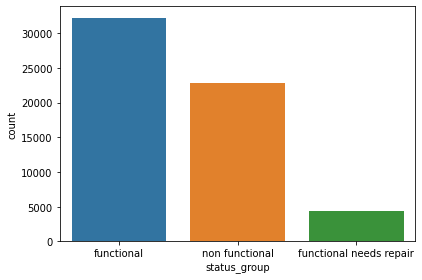

In [11]:
sns.countplot(x='status_group', data=y)
plt.tight_layout()


#Checking the null values

In [12]:
print('Checking null Values in the Training \n{}'.format(X.isnull().sum()))
print('\nChecking null Values in the Labels \n{}'.format(y.isnull().sum()))


Checking null Values in the Training 
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
q

In [13]:
print('\nChecking null Values in the Testing \n{}'.format(test_dataset.isnull().sum()))


Checking null Values in the Testing 
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
qu

In [14]:
#Join the labels to the trainning set
joined_train = X.join(y)

In [15]:
print('\nChecking Duplicated values in the training set {}'.format(X.duplicated().sum()))
print('Checking Duplicated values in the test set {}'.format(test_dataset.duplicated().sum()))


Checking Duplicated values in the training set 37
Checking Duplicated values in the test set 1


In [16]:
joined_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [17]:
#Look the data types of the features
X.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [18]:
#Drop duplicates in train
joined_train.drop_duplicates(subset=joined_train.columns, keep="first", inplace=True)

print('Number if duplicated values in train {}'.format(joined_train.duplicated().sum()))


Number if duplicated values in train 0


In [19]:
X = joined_train.iloc[:,:-1]

In [20]:
X.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [21]:
X.shape

(59364, 39)

In [22]:
#Combine the train and test data
df=X.append(test)
print(df.shape)

(74214, 39)


In [23]:
print('Checking null Values \n{}'.format(df.isnull().sum()))

Checking null Values 
amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4135
recorded_by                  0
scheme_management         4846
scheme_name              35231
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group    

#NaN imputation



In [24]:
print('Checking available types of funder \n{}'.format(df['funder'].value_counts(normalize=True)))
print('\nChecking available types of funder \n{}'.format(df['installer'].value_counts(normalize=True)))


Checking available types of funder 
Government Of Tanzania    0.161971
Danida                    0.056046
Hesawa                    0.039851
Rwssp                     0.024401
World Bank                0.024401
                            ...   
Mosha                     0.000014
Meco                      0.000014
Prodap                    0.000014
Wazieni Bilangali         0.000014
Mzee Smith                0.000014
Name: funder, Length: 2140, dtype: float64

Checking available types of funder 
DWE                0.311903
Government         0.032648
RWE                0.021483
Commu              0.019331
DANIDA             0.018728
                     ...   
SIMBA              0.000014
HESAWQ             0.000014
Mr Kwi             0.000014
NJOOCHO MASAINE    0.000014
Mzee Smith         0.000014
Name: installer, Length: 2410, dtype: float64


Nan imputation for 'funder' and 'installer' using the Mode and impute irrelevant values with 'other' category

In [25]:
#function for impute NaN values using mode and replace un-usual characters for 'other' categoery 
def imput_nan(col_list, df):
  for col in col_list:
    df[col].fillna(df[col].mode()[0], inplace=True)
    df[col].replace(to_replace=('0','-', None), value='other', inplace=True)

In [26]:
funder_types = list(map(str,df["funder"].unique()))
installer_types = list(map(str,df["installer"].unique()))
funder_types.sort()
installer_types.sort()

print('\nChecking available types of funder \n{}'.format(funder_types)) 
print('\nChecking available types of installer \n{}'.format(installer_types))


Checking available types of funder 
['0', 'A/co Germany', 'Aar', 'Abas Ka', 'Abasia', 'Abc-ihushi Development Cent', 'Abd', 'Abdala', 'Abddwe', 'Abdul', 'Abood', 'Abs', 'Aco/germany', 'Acord', 'Acord Ngo', 'Acra', 'Act', 'Act Mara', 'Action Aid', 'Action Contre La Faim', 'Action In A', 'Adap', 'Adb', 'Adf', 'Adp', 'Adp Bungu', 'Adp Mombo', 'Adp/w', 'Adra', 'Af', 'Afdp', 'Afric', 'Africa', 'Africa 2000 Network/undp', 'Africa Amini Alama', 'Africa Project Ev Germany', 'African', 'African 2000 Network', 'African Barrick Gold', 'African Development Bank', 'African Development Foundation', 'African Muslim Agency', 'African Realief Committe Of Ku', 'African Reflections Foundation', 'African Relie', 'Africaone Ltd', 'Africare', 'Afriican Reli', 'Afroz Ismail', 'Afya Department Lindi Rural', 'Agape Churc', 'Agness', 'Agt Church', 'Ahmadia', 'Ai', 'Aic', 'Aic Church', 'Aic Kij', 'Aict', 'Aimgold', 'Aixos', 'Alia', 'Aljazera', 'Ambwene Mwaikek', 'Amref', 'Amrefe', 'Anglican Church', 'Angrikana'

In [27]:
col_list1 = ['funder','installer']

In [28]:
#calling the impute_nan fuction for 'funder' and 'installer' features
imput_nan(col_list1, df)

Nan imputation for 'subvillage', 'scheme_management' and 'scheme_name' by grouping

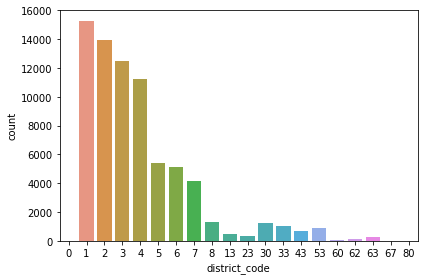

In [29]:
sns.countplot(x='district_code', data=df)
plt.tight_layout()


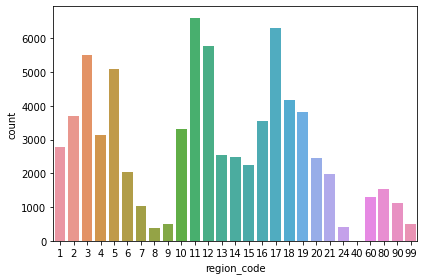

In [30]:
sns.countplot(x='region_code', data=df)
plt.tight_layout()


In [31]:
#group by using region_code or region 
subvillage_region_code = df.groupby(['region_code'])['subvillage'].agg(pd.Series.mode)
scheme_name_region_code = df.groupby(['region'])['scheme_name'].agg(pd.Series.mode)
scheme_management_region_code = df.groupby(['region_code'])['scheme_management'].agg(pd.Series.mode)

In [32]:
#function for impute nan values
def impute_mode(df,map_df,col,grouped_col):
  df.loc[df[col].isnull(),[col]] = df[df[col].isnull()].apply(
      lambda row: map_df.loc[row[grouped_col]][0],axis=1
  )

In [33]:
#calling the impute_nan fuction for 'subvillage', 'scheme_name' and 'scheme_management' features
impute_mode(df,subvillage_region_code,'subvillage','region_code')
impute_mode(df,scheme_name_region_code,'scheme_name','region')
impute_mode(df,scheme_management_region_code,'scheme_management','region_code')


Nan imputation for 'public_meeting' using Mode

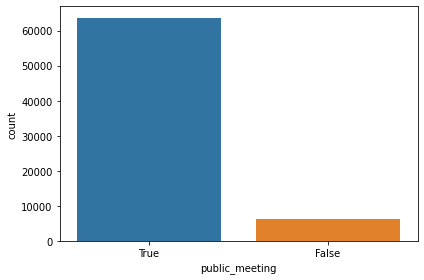

In [34]:
sns.countplot(x='public_meeting', data=df)
plt.tight_layout()


In [35]:
#impute nan values using mode
df['public_meeting'].fillna(df['public_meeting'].mode()[0], inplace=True)

Nan imputation for 'permit' using Mode

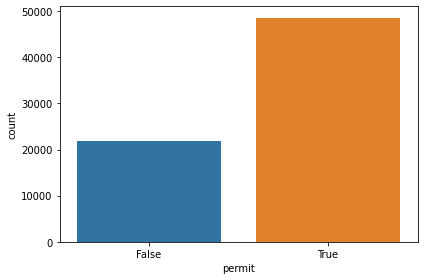

In [36]:
sns.countplot(x='permit', data=df)
plt.tight_layout()


In [37]:
#impute nan values using mode
df['permit'].fillna(df['permit'].mode()[0], inplace=True)

In [38]:
print('Checking null Values in the Training \n{}'.format(df.isnull().sum()))

Checking null Values in the Training 
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type      

#Remove '0' values in selected features

In [39]:
df['gps_height']

id
69572    1390
8776     1399
34310     686
67743     263
19728       0
         ... 
39307      34
18990       0
28749    1476
33492     998
68707     481
Name: gps_height, Length: 74214, dtype: int64

In [40]:
df['gps_height']=df['gps_height'].mask(df['gps_height']==0).fillna(df['gps_height'].mean())
df['amount_tsh']=df['amount_tsh'].mask(df['amount_tsh']==0).fillna(df['amount_tsh'].mean())


In [41]:
df['gps_height']

id
69572    1390.000000
8776     1399.000000
34310     686.000000
67743     263.000000
19728     665.990217
            ...     
39307      34.000000
18990     665.990217
28749    1476.000000
33492     998.000000
68707     481.000000
Name: gps_height, Length: 74214, dtype: float64

# Outlier detection and correcting values of longitude and latitudes

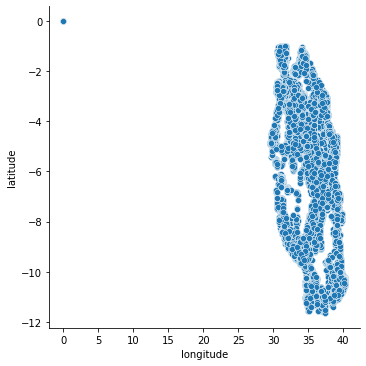

In [42]:
sns.relplot(
    x="longitude", y="latitude", data=df
);

In [43]:
df_geo = df.groupby(['region_code'])[['latitude', 'longitude']].mean()

In [44]:
 df.loc[df['longitude'] == 0,['latitude', 'longitude']] = df[df['longitude']==0].apply(
     lambda row: df_geo.loc[row['region_code'],['latitude', 'longitude']],axis=1
)[['latitude', 'longitude']]

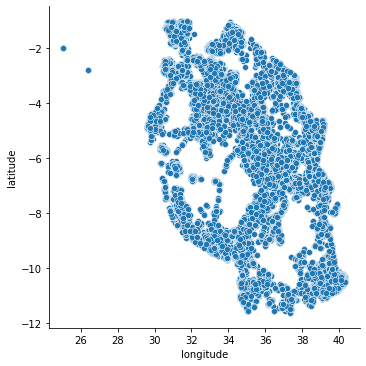

In [45]:
sns.relplot(
    x="longitude", y="latitude", data=df
);

## Normalize the data

In [46]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.000000,2011-03-14,Roman,1390.000000,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,318.840294,2013-03-06,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,M,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.000000,2013-02-25,Lottery Club,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,318.840294,2013-01-28,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,B,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,318.840294,2011-07-13,Action In A,665.990217,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,V,K,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [47]:
#Using log normalization
def logNormalize(x):
    try:
        x = x.apply(lambda x: np.log10(x+1))
        return x
    except :
        raise

In [48]:
df.district_code.value_counts()

1     15277
2     13928
3     12520
4     11253
5      5428
6      5096
7      4166
8      1282
30     1256
33     1063
53      921
43      653
13      496
23      360
63      264
62      127
60       76
0        27
80       13
67        8
Name: district_code, dtype: int64

In [49]:
df.gps_height.value_counts()

 665.990217     25613
-16.000000         71
-15.000000         69
-13.000000         68
-19.000000         65
                ...  
 2467.000000        1
 2281.000000        1
 2323.000000        1
 2385.000000        1
 2388.000000        1
Name: gps_height, Length: 2456, dtype: int64

In [50]:
df.population = logNormalize(df.population)
# df.amount_tsh = logNormalize(df.amount_tsh)
# df.gps_height = logNormalize(df.gps_height)

In [51]:
# Using min-max normalization
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler() 

column_names_to_normalize = ['amount_tsh','gps_height']
x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp

In [52]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,0.017142,2011-03-14,Roman,0.516219,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,2.041393,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.000910,2013-03-06,Grumeti,0.519358,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,2.448706,True,GeoData Consultants Ltd,Other,M,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,0.000071,2013-02-25,Lottery Club,0.270666,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,2.399674,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.000910,2013-01-28,Unicef,0.123125,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,1.770852,True,GeoData Consultants Ltd,VWC,B,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.000910,2011-07-13,Action In A,0.263687,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0.000000,True,GeoData Consultants Ltd,V,K,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


## Re-split data

In [53]:
# len(test)

In [54]:
test = df[len(X):]
X = df[:len(X)]


In [55]:
X.shape, test.shape

((59364, 39), (14850, 39))

In [56]:
print('\nChecking Null Values in Training \n{}'.format(X.isnull().sum()))


Checking Null Values in Training 
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type         

In [57]:
print('\nChecking Null Values in testing \n{}'.format(test.isnull().sum()))


Checking Null Values in testing 
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type          

#categorical attribute correlation



joined dataset

In [58]:
len(X.columns)

39

In [59]:
y = joined_train["status_group"]

In [60]:
X.shape, y.shape

((59364, 39), (59364,))

In [61]:
joined_processed_train = X.join(y)

In [62]:
joined_processed_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,0.017142,2011-03-14,Roman,0.516219,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,2.041393,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.000910,2013-03-06,Grumeti,0.519358,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,2.448706,True,GeoData Consultants Ltd,Other,M,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,0.000071,2013-02-25,Lottery Club,0.270666,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,2.399674,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.000910,2013-01-28,Unicef,0.123125,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,1.770852,True,GeoData Consultants Ltd,VWC,B,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.000910,2011-07-13,Action In A,0.263687,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0.000000,True,GeoData Consultants Ltd,V,K,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [63]:
joined_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [64]:
float_cols = ["amount_tsh","longitude","latitude"]

int_cols = ["gps_height","num_private","population","construction_year"]

categorical_cols = [
        'funder', 'installer','wpt_name', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 
       'lga', 'ward','public_meeting', 'recorded_by', 
       'scheme_management','scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 
       'source_type','source_class', 'waterpoint_type', 
       'waterpoint_type_group'
       ]

cols = categorical_cols+int_cols+float_cols+["date_recorded"]

In [65]:
cat_cols = categorical_cols +["status_group"]

In [66]:
joined_processed_train_cat = joined_processed_train.loc[:,cat_cols]

#Generating new featuers

In [67]:
joined_processed_train['date_recorded'] = pd.to_datetime(joined_processed_train['date_recorded'])
joined_processed_train['year'] = joined_processed_train['date_recorded'].dt.year
joined_processed_train['month'] = joined_processed_train['date_recorded'].dt.month
joined_processed_train.drop(columns = 'date_recorded', inplace = True)

In [68]:
test['date_recorded'] = pd.to_datetime(test['date_recorded'])
test['year'] = test['date_recorded'].dt.year
test['month'] = test['date_recorded'].dt.month
test.drop(columns = 'date_recorded', inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [69]:
joined_processed_train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year,month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,0.017142,Roman,0.516219,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,2.041393,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3
8776,0.000910,Grumeti,0.519358,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,2.448706,True,GeoData Consultants Ltd,Other,M,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3
34310,0.000071,Lottery Club,0.270666,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,2.399674,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2
67743,0.000910,Unicef,0.123125,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,1.770852,True,GeoData Consultants Ltd,VWC,B,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1
19728,0.000910,Action In A,0.263687,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0.000000,True,GeoData Consultants Ltd,V,K,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7


In [70]:
test.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year,month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.000910,Dmdd,0.727590,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,2.507856,True,GeoData Consultants Ltd,Parastatal,K,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,2013,2
51630,0.000910,Government Of Tanzania,0.578654,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,2.478566,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,2013,2
17168,0.000910,Government Of Tanzania,0.577956,DWE,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,2.699838,True,GeoData Consultants Ltd,VWC,P,True,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,2013,2
45559,0.000910,Finn Water,0.124520,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,2.399674,True,GeoData Consultants Ltd,VWC,G,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,2013,1
49871,0.001428,Bruder,0.470875,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,1.785330,True,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013,3


#Pre processing steps for Random Forrest  and XGBoost

In [71]:
# print(joined_processed_train.shape)
# print(test.shape)

In [72]:
# joined_processed_train.dtypes

In [73]:
# cat_cols=[ colname for colname in joined_processed_train.select_dtypes("object") ]

In [74]:
# cat_cols

In [75]:
# cat_cols.remove('status_group')

In [76]:
# #onehot encode
# def oneHotEncode(data, cat_cols):
#     cat_data = data.loc[:,cat_cols]
#     cat_data = pd.get_dummies(cat_data.astype(str), drop_first=True)
#     data = data.drop(cat_cols,axis=1)
#     data = pd.concat([data,cat_data], axis=1)
#     return data

In [77]:
# encoded_train = oneHotEncode(joined_processed_train, cat_cols)
# encoded_test = oneHotEncode(test, cat_cols)


In [78]:
# encoded_train.head()

In [79]:
# def drop_missing_dummy_columns( test_cols, X ):
#     missing_cols = set( X.columns ) - set( test_cols )
#     X = X.loc[:,[col for col in X.columns if col not in missing_cols]]
#     return X

In [80]:
# label_set = encoded_train.pop("status_group")

In [81]:
# label_set

In [82]:
# X = drop_missing_dummy_columns(encoded_test.columns, encoded_train)
# test = drop_missing_dummy_columns(encoded_train.columns, encoded_test)

In [83]:
# X.shape,test.shape

#XGBoost

In [84]:
# from xgboost import XGBClassifier
# from sklearn.multiclass import OneVsRestClassifier

# clf_multilabel = OneVsRestClassifier(XGBClassifier())
# clf_multilabel.fit(X.values,label_set.values)

In [85]:
# y_pred = clf_multilabel.predict(test.values)

In [86]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn import metrics

# print("   Accuracy: {}".format(metrics.accuracy_score(y_eval, y_pred)))

# print(classification_report(y_eval,y_pred))

#CatBoost

In [87]:
X_selected = joined_processed_train.drop(columns=["status_group"])

In [88]:
num_cols = int_cols+float_cols+['year','month']
cat_cols_selected = list(set(joined_processed_train.columns)-set(num_cols)-set(['status_group']))

In [89]:
X_selected[cat_cols_selected] = X_selected[cat_cols_selected].astype('category')
test[cat_cols_selected] = test[cat_cols_selected].astype('category')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [90]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 30 kB/s 


In [91]:
 from catboost import CatBoostClassifier

 model = CatBoostClassifier(
        max_ctr_complexity=5,
        task_type='CPU',
        iterations=1000,
        eval_metric='AUC',
        od_type='Iter',
        od_wait=500,
        cat_features = cat_cols_selected,
        verbose=False
    )

#For the evaluation dataset spliting using skLearn

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state = 42, test_size=0.1,  stratify=y)

In [93]:
model.fit(X_train,y_train)

In [94]:
pred = model.predict(X_test)

In [95]:
pred

array([['non functional'],
       ['non functional'],
       ['functional'],
       ...,
       ['functional'],
       ['functional'],
       ['non functional']], dtype=object)

Accuracy Score:  0.8164055920498569


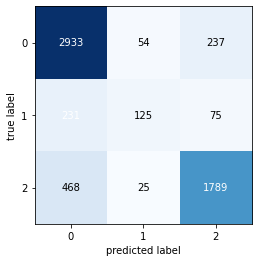

In [96]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score

print("Accuracy Score: ", accuracy_score(y_test, pred))
cm = confusion_matrix(y_test, pred.flatten())
plot_confusion_matrix(cm)
plt.show()

#0.8164055920498569 -> only using normalization for population
#0.8157318511032507 -> log normalize ->population &  min max normalize - v1
#0.8160687215765539 -> log normalize -> population &  min max normalize - v2 with lattitude and longitute outlier removing
# 0.8174162034697658 -> log normalize -> population &  min max normalize - v2 with lattitude and longitute outlier removing and added new feature

In [97]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, pred)))

print(classification_report(y_test,pred))

   Accuracy: 0.8164055920498569
                         precision    recall  f1-score   support

             functional       0.81      0.91      0.86      3224
functional needs repair       0.61      0.29      0.39       431
         non functional       0.85      0.78      0.82      2282

               accuracy                           0.82      5937
              macro avg       0.76      0.66      0.69      5937
           weighted avg       0.81      0.82      0.81      5937



#For the test dataset

In [98]:
X_selected.shape, test.shape

((59364, 40), (14850, 40))

In [99]:
model.fit(X_selected,y)

In [100]:
pred = model.predict(test)

In [101]:
pred

array([['functional'],
       ['functional'],
       ['functional'],
       ...,
       ['functional'],
       ['functional'],
       ['non functional']], dtype=object)

Submission

In [102]:
test.index

Int64Index([50785, 51630, 17168, 45559, 49871, 52449, 24806, 28965, 36301,
            54122,
            ...
            59757, 64579, 57731, 65541, 68174, 39307, 18990, 28749, 33492,
            68707],
           dtype='int64', name='id', length=14850)

In [103]:
y_pred_df = pd.DataFrame(
    {
        "status_group": pred.flat
    },
    index = test.index
)

In [105]:
y_pred_df.head()

,status_group
id,
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional


In [106]:
y_pred_df.shape

(14850, 1)

In [107]:
 y_pred_df.to_csv("submission_Catboost10_normalize5.csv", index=True)